In [13]:
#import statements
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

#display output directly below plotting commands inline
%matplotlib inline

In [14]:
#import review dataset using pandas, limit rows to 100,000
reviews = pd.read_csv('../input files/yelp_review.csv', nrows= 100000)

In [15]:
#create a text length column at end of data set
reviews['text length'] = reviews['text'].apply(len)

#limit reviews to either 1 or 5 stars
review_class = reviews[(reviews['stars'] == 1) | (reviews['stars'] == 5)]
review_class.shape

(55986, 10)

In [16]:
#create variables for review text and rating
X = review_class['text']
y = review_class['stars']

import string

#Global stopwords to save processing power
stoplist = stopwords.words('english')

#text tokenizer
def text_processor(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stoplist and not word.isdigit()]

In [17]:
#vectorize the review text
text_vector = CountVectorizer(analyzer=text_processor).fit(X)

#determine length
len(text_vector.vocabulary_)

101927

In [18]:
#transform X
X = text_vector.transform(X)

In [19]:
#creation and splitting of training and testing models
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [20]:
#import and train the random forest classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
#confusion matrix and report
rfc_predict = rfc.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print('Confusion Matrix')
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print('Accuracy Report')
print(classification_report(y_test, rfc_predict))

Confusion Matrix
[[1876  816]
 [  69 8437]]


Accuracy Report
              precision    recall  f1-score   support

           1       0.96      0.70      0.81      2692
           5       0.91      0.99      0.95      8506

    accuracy                           0.92     11198
   macro avg       0.94      0.84      0.88     11198
weighted avg       0.92      0.92      0.92     11198



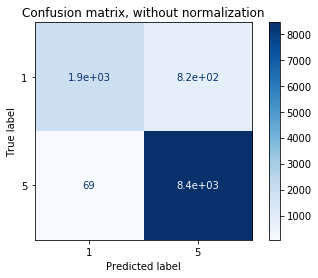

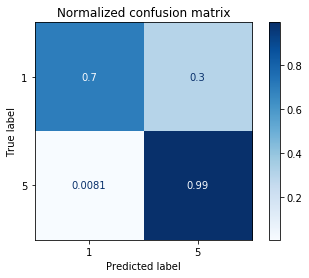

In [22]:
#plot confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rfc, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

In [23]:
#output report to a csv file in 'output files'
reportDf = pd.DataFrame(classification_report(y_test, rfc_predict, output_dict=True)).transpose()

reportDf.to_csv(r'../output files/RFC.csv', index = False)

print('Output written to RFC.csv')

Output written to RFC.csv
